In [2]:
import pandas as pd
import warnings
import seaborn as sns
import matplotlib.pyplot as plt

warnings.filterwarnings('ignore')

In [3]:
data=pd.read_csv("/content/Sample_Submission.csv")


In [4]:

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11399 entries, 0 to 11398
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                11399 non-null  object 
 1   Time_taken (min)  11399 non-null  float64
dtypes: float64(1), object(1)
memory usage: 178.2+ KB


In [5]:
data

,ID,Time_taken (min)
0,0x2318,25.668333
1,0x3474,27.881667
2,0x9420,27.023333
3,0x72ee,28.153333
4,0xa759,21.018333
...,...,...
11394,0x6909,21.972500
11395,0x443b,29.390000
11396,0x1ea5,26.244167
11397,0x22d4,23.752500


In [6]:
data.shape

(11399, 2)

In [7]:
data.isnull().sum()

ID                  0
Time_taken (min)    0
dtype: int64

In [8]:
data.dtypes

ID                   object
Time_taken (min)    float64
dtype: object

In [9]:
data.head()

,ID,Time_taken (min)
0,0x2318,25.668333
1,0x3474,27.881667
2,0x9420,27.023333
3,0x72ee,28.153333
4,0xa759,21.018333


In [10]:
data.tail()

,ID,Time_taken (min)
11394,0x6909,21.972500
11395,0x443b,29.390000
11396,0x1ea5,26.244167
11397,0x22d4,23.752500
11398,0xb7be,23.827500


In [11]:
data.describe

<bound method NDFrame.describe of             ID  Time_taken (min)
0      0x2318          25.668333
1      0x3474          27.881667
2      0x9420          27.023333
3      0x72ee          28.153333
4      0xa759          21.018333
...        ...               ...
11394  0x6909          21.972500
11395  0x443b          29.390000
11396  0x1ea5          26.244167
11397  0x22d4          23.752500
11398  0xb7be          23.827500

[11399 rows x 2 columns]>

In [12]:
train_data=pd.read_csv("/content/train.csv")


In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11399 entries, 0 to 11398
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                11399 non-null  object 
 1   Time_taken (min)  11399 non-null  float64
dtypes: float64(1), object(1)
memory usage: 178.2+ KB


In [14]:
train_data.shape

(24586, 20)

In [15]:
train_data.head()

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weatherconditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken(min)
0,0x4607,INDORES13DEL02,37,4.9,22.745049,75.892471,22.765049,75.912471,19-03-2022,11:30:00,11:45:00,conditions Sunny,High,2,Snack,motorcycle,0,No,Urban,(min) 24
1,0xb379,BANGRES18DEL02,34,4.5,12.913041,77.683237,13.043041,77.813237,25-03-2022,19:45:00,19:50:00,conditions Stormy,Jam,2,Snack,scooter,1,No,Metropolitian,(min) 33
2,0x5d6d,BANGRES19DEL01,23,4.4,12.914264,77.678400,12.924264,77.688400,19-03-2022,08:30:00,08:45:00,conditions Sandstorms,Low,0,Drinks,motorcycle,1,No,Urban,(min) 26
3,0x7a6a,COIMBRES13DEL02,38,4.7,11.003669,76.976494,11.053669,77.026494,05-04-2022,18:00:00,18:10:00,conditions Sunny,Medium,0,Buffet,motorcycle,1,No,Metropolitian,(min) 21
4,0x70a2,CHENRES12DEL01,32,4.6,12.972793,80.249982,13.012793,80.289982,26-03-2022,13:30:00,13:45:00,conditions Cloudy,High,1,Snack,scooter,1,No,Metropolitian,(min) 30


In [16]:
train_data.tail()

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weatherconditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken(min)
24581,0x9d9,CHENRES02DEL01,33,3.8,13.086438,80.220672,13.156439,80.290672,02-04-2022,22:00:00,22:10:00,conditions Windy,Jam,1,Meal,motorcycle,1,No,Metropolitian,(min) 35
24582,0x2630,BANGRES11DEL01,37,4.2,12.934365,77.616155,13.044365,77.726155,12-03-2022,23:35:00,23:50:00,conditions Cloudy,Low,2,Drinks,motorcycle,1,No,Metropolitian,(min) 31
24583,0xa8ec,MYSRES06DEL02,30,4.9,12.323994,76.626167,12.453994,76.756167,10-03-2022,21:35:00,21:45:00,conditions Sunny,Jam,0,Meal,motorcycle,1,No,Metropolitian,(min) 33
24584,0x8077,CHENRES20DEL02,38,5,12.975996,80.221898,13.105996,80.351898,16-03-2022,23:35:00,23:40:00,conditions Stormy,Low,2,Drinks,motorcycle,0,No,Metropolitian,(min) 25
24585,0x7fed,RANCHIRES01DEL03,21,4.8,23.416792,85.316842,23.446792,85.346842,17-03-2022,23:15:00,23:20:00,conditions Stormy,Low,2,Drinks,NaN,NaN,NaN,NaN,NaN


In [17]:
train_data.isnull().sum()

ID                             0
Delivery_person_ID             0
Delivery_person_Age            0
Delivery_person_Ratings        0
Restaurant_latitude            0
Restaurant_longitude           0
Delivery_location_latitude     0
Delivery_location_longitude    0
Order_Date                     0
Time_Orderd                    0
Time_Order_picked              0
Weatherconditions              0
Road_traffic_density           0
Vehicle_condition              0
Type_of_order                  0
Type_of_vehicle                1
multiple_deliveries            1
Festival                       1
City                           1
Time_taken(min)                1
dtype: int64

In [18]:
train_data.dtypes

ID                              object
Delivery_person_ID              object
Delivery_person_Age             object
Delivery_person_Ratings         object
Restaurant_latitude            float64
Restaurant_longitude           float64
Delivery_location_latitude     float64
Delivery_location_longitude    float64
Order_Date                      object
Time_Orderd                     object
Time_Order_picked               object
Weatherconditions               object
Road_traffic_density            object
Vehicle_condition                int64
Type_of_order                   object
Type_of_vehicle                 object
multiple_deliveries             object
Festival                        object
City                            object
Time_taken(min)                 object
dtype: object

In [19]:
train_data.describe

<bound method NDFrame.describe of             ID Delivery_person_ID Delivery_person_Age Delivery_person_Ratings  \
0      0x4607     INDORES13DEL02                   37                     4.9   
1      0xb379     BANGRES18DEL02                   34                     4.5   
2      0x5d6d     BANGRES19DEL01                   23                     4.4   
3      0x7a6a    COIMBRES13DEL02                   38                     4.7   
4      0x70a2     CHENRES12DEL01                   32                     4.6   
...        ...                ...                 ...                     ...   
24581   0x9d9     CHENRES02DEL01                   33                     3.8   
24582  0x2630     BANGRES11DEL01                   37                     4.2   
24583  0xa8ec      MYSRES06DEL02                   30                     4.9   
24584  0x8077     CHENRES20DEL02                   38                       5   
24585  0x7fed   RANCHIRES01DEL03                   21                     4.8   

       Restaurant_latitude  Restaurant_longitude  Delivery_location_latitude  \
0                22.745049             75.892471                   22.765049   
1                12.913041             77.683237                   13.043041   
2                12.914264             77.678400                   12.924264   
3                11.003669             76.976494                   11.053669   
4                12.972793             80.249982                   13.012793   
...                    ...                   ...                         ...   
24581            13.086438             80.220672                   13.156439   
24582            12.934365             77.616155                   13.044365   
24583            12.323994             76.626167                   12.453994   
24584            12.975996             80.221898                   13.105996   
24585            23.416792             85.316842                   23.446792   

       Delivery_location_longitude  Order_Date Time_Orderd Time_Order_picked  \
0                        75.912471  19-03-2022    11:30:00          11:45:00   
1                        77.813237  25-03-2022    19:45:00          19:50:00   
2                        77.688400  19-03-2022    08:30:00          08:45:00   
3                        77.026494  05-04-2022    18:00:00          18:10:00   
4                        80.289982  26-03-2022    13:30:00          13:45:00   
...                            ...         ...         ...               ...   
24581                    80.290672  02-04-2022    22:00:00          22:10:00   
24582                    77.726155  12-03-2022    23:35:00          23:50:00   
24583                    76.756167  10-03-2022    21:35:00          21:45:00   
24584                    80.351898  16-03-2022    23:35:00          23:40:00   
24585                    85.346842  17-03-2022    23:15:00          23:20:00   

           Weatherconditions Road_traffic_density  Vehicle_condition  \
0           conditions Sunny                High                   2   
1          conditions Stormy                 Jam                   2   
2      conditions Sandstorms                 Low                   0   
3           conditions Sunny              Medium                   0   
4          conditions Cloudy                High                   1   
...                      ...                  ...                ...   
24581       conditions Windy                 Jam                   1   
24582      conditions Cloudy                 Low                   2   
24583       conditions Sunny                 Jam                   0   
24584      conditions Stormy                 Low                   2   
24585      conditions Stormy                 Low                   2   

      Type_of_order Type_of_vehicle multiple_deliveries Festival  \
0            Snack      motorcycle                    0      No    
1            Snack         scooter                    1      No    
2 

In [20]:
train_data.drop(['ID'],axis=1,inplace=True)

In [21]:
if 'Delivery_person_ID' in train_data.columns:
    train_data.drop(['Delivery_person_ID'], axis=1, inplace=True)
    print("Column 'Delivery_person_ID' dropped successfully.")
else:
    print("Column 'Delivery_person_ID' not found in the DataFrame.")


Column 'Delivery_person_ID' dropped successfully.


In [22]:

train_data.drop(['Order_Date'],axis=1,inplace=True)

In [23]:
train_data

,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Time_Orderd,Time_Order_picked,Weatherconditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken(min)
0,37,4.9,22.745049,75.892471,22.765049,75.912471,11:30:00,11:45:00,conditions Sunny,High,2,Snack,motorcycle,0,No,Urban,(min) 24
1,34,4.5,12.913041,77.683237,13.043041,77.813237,19:45:00,19:50:00,conditions Stormy,Jam,2,Snack,scooter,1,No,Metropolitian,(min) 33
2,23,4.4,12.914264,77.678400,12.924264,77.688400,08:30:00,08:45:00,conditions Sandstorms,Low,0,Drinks,motorcycle,1,No,Urban,(min) 26
3,38,4.7,11.003669,76.976494,11.053669,77.026494,18:00:00,18:10:00,conditions Sunny,Medium,0,Buffet,motorcycle,1,No,Metropolitian,(min) 21
4,32,4.6,12.972793,80.249982,13.012793,80.289982,13:30:00,13:45:00,conditions Cloudy,High,1,Snack,scooter,1,No,Metropolitian,(min) 30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24581,33,3.8,13.086438,80.220672,13.156439,80.290672,22:00:00,22:10:00,conditions Windy,Jam,1,Meal,motorcycle,1,No,Metropolitian,(min) 35
24582,37,4.2,12.934365,77.616155,13.044365,77.726155,23:35:00,23:50:00,conditions Cloudy,Low,2,Drinks,motorcycle,1,No,Metropolitian,(min) 31
24583,30,4.9,12.323994,76.626167,12.453994,76.756167,21:35:00,21:45:00,conditions Sunny,Jam,0,Meal,motorcycle,1,No,Metropolitian,(min) 33
24584,38,5,12.975996,80.221898,13.105996,80.351898,23:35:00,23:40:00,conditions Stormy,Low,2,Drinks,motorcycle,0,No,Metropolitian,(min) 25


In [24]:
test_data=pd.read_csv("/content/test.csv")

In [25]:

test_data

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weatherconditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City
0,0x2318,COIMBRES13DEL01,NaN,NaN,11.003669,76.976494,11.043669,77.016494,30-03-2022,NaN,15:05:00,conditions NaN,NaN,3,Drinks,electric_scooter,1,No,Metropolitian
1,0x3474,BANGRES15DEL01,28,4.6,12.975377,77.696664,13.085377,77.806664,29-03-2022,20:30:00,20:35:00,conditions Windy,Jam,0,Snack,motorcycle,1,No,Metropolitian
2,0x9420,JAPRES09DEL03,23,4.5,26.911378,75.789034,27.001378,75.879034,10-03-2022,19:35:00,19:45:00,conditions Stormy,Jam,0,Drinks,motorcycle,1,No,Metropolitian
3,0x72ee,JAPRES07DEL03,21,4.8,26.766536,75.837333,26.856536,75.927333,02-04-2022,17:15:00,17:20:00,conditions Fog,Medium,1,Meal,scooter,1,No,Metropolitian
4,0xa759,CHENRES19DEL01,31,4.6,12.986047,80.218114,13.096047,80.328114,27-03-2022,18:25:00,18:40:00,conditions Sunny,Medium,2,Drinks,scooter,1,No,Metropolitian
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11394,0x6909,JAPRES01DEL01,35,4.6,26.905190,75.810753,27.015190,75.920753,27-03-2022,21:35:00,21:45:00,conditions Sunny,Jam,1,Snack,scooter,1,No,Metropolitian
11395,0x443b,JAPRES11DEL01,33,4.9,26.902940,75.793007,26.912940,75.803007,11-03-2022,11:40:00,11:45:00,conditions Sandstorms,High,1,Drinks,scooter,1,No,Metropolitian
11396,0x1ea5,SURRES11DEL03,NaN,NaN,21.157735,72.768778,21.217735,72.828778,11-03-2022,NaN,21:05:00,conditions NaN,NaN,3,Drinks,scooter,1,No,Metropolitian
11397,0x22d4,VADRES03DEL02,27,4.7,22.320000,73.170000,22.450000,73.300000,06-03-2022,18:35:00,18:40:00,conditions Sandstorms,Medium,0,Meal,motorcycle,0,No,Metropolitian


In [26]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11399 entries, 0 to 11398
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ID                           11399 non-null  object 
 1   Delivery_person_ID           11399 non-null  object 
 2   Delivery_person_Age          11399 non-null  object 
 3   Delivery_person_Ratings      11399 non-null  object 
 4   Restaurant_latitude          11399 non-null  float64
 5   Restaurant_longitude         11399 non-null  float64
 6   Delivery_location_latitude   11399 non-null  float64
 7   Delivery_location_longitude  11399 non-null  float64
 8   Order_Date                   11399 non-null  object 
 9   Time_Orderd                  11399 non-null  object 
 10  Time_Order_picked            11399 non-null  object 
 11  Weatherconditions            11399 non-null  object 
 12  Road_traffic_density         11399 non-null  object 
 13  Vehicle_conditio

In [27]:
test_data.shape

(11399, 19)

In [28]:
test_data.head()

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weatherconditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City
0,0x2318,COIMBRES13DEL01,NaN,NaN,11.003669,76.976494,11.043669,77.016494,30-03-2022,NaN,15:05:00,conditions NaN,NaN,3,Drinks,electric_scooter,1,No,Metropolitian
1,0x3474,BANGRES15DEL01,28,4.6,12.975377,77.696664,13.085377,77.806664,29-03-2022,20:30:00,20:35:00,conditions Windy,Jam,0,Snack,motorcycle,1,No,Metropolitian
2,0x9420,JAPRES09DEL03,23,4.5,26.911378,75.789034,27.001378,75.879034,10-03-2022,19:35:00,19:45:00,conditions Stormy,Jam,0,Drinks,motorcycle,1,No,Metropolitian
3,0x72ee,JAPRES07DEL03,21,4.8,26.766536,75.837333,26.856536,75.927333,02-04-2022,17:15:00,17:20:00,conditions Fog,Medium,1,Meal,scooter,1,No,Metropolitian
4,0xa759,CHENRES19DEL01,31,4.6,12.986047,80.218114,13.096047,80.328114,27-03-2022,18:25:00,18:40:00,conditions Sunny,Medium,2,Drinks,scooter,1,No,Metropolitian


In [29]:
test_data.tail()

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weatherconditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City
11394,0x6909,JAPRES01DEL01,35,4.6,26.905190,75.810753,27.015190,75.920753,27-03-2022,21:35:00,21:45:00,conditions Sunny,Jam,1,Snack,scooter,1,No,Metropolitian
11395,0x443b,JAPRES11DEL01,33,4.9,26.902940,75.793007,26.912940,75.803007,11-03-2022,11:40:00,11:45:00,conditions Sandstorms,High,1,Drinks,scooter,1,No,Metropolitian
11396,0x1ea5,SURRES11DEL03,NaN,NaN,21.157735,72.768778,21.217735,72.828778,11-03-2022,NaN,21:05:00,conditions NaN,NaN,3,Drinks,scooter,1,No,Metropolitian
11397,0x22d4,VADRES03DEL02,27,4.7,22.320000,73.170000,22.450000,73.300000,06-03-2022,18:35:00,18:40:00,conditions Sandstorms,Medium,0,Meal,motorcycle,0,No,Metropolitian
11398,0xb7be,CHENRES07DEL02,39,5,13.081878,80.248519,13.131878,80.298519,24-03-2022,22:20:00,22:25:00,conditions Windy,Low,2,Drinks,motorcycle,1,No,Urban


In [30]:
test_data.dtypes

ID                              object
Delivery_person_ID              object
Delivery_person_Age             object
Delivery_person_Ratings         object
Restaurant_latitude            float64
Restaurant_longitude           float64
Delivery_location_latitude     float64
Delivery_location_longitude    float64
Order_Date                      object
Time_Orderd                     object
Time_Order_picked               object
Weatherconditions               object
Road_traffic_density            object
Vehicle_condition                int64
Type_of_order                   object
Type_of_vehicle                 object
multiple_deliveries             object
Festival                        object
City                            object
dtype: object

In [31]:
test_data.describe

<bound method NDFrame.describe of             ID Delivery_person_ID Delivery_person_Age Delivery_person_Ratings  \
0      0x2318    COIMBRES13DEL01                 NaN                     NaN    
1      0x3474     BANGRES15DEL01                   28                     4.6   
2      0x9420      JAPRES09DEL03                   23                     4.5   
3      0x72ee      JAPRES07DEL03                   21                     4.8   
4      0xa759     CHENRES19DEL01                   31                     4.6   
...        ...                ...                 ...                     ...   
11394  0x6909      JAPRES01DEL01                   35                     4.6   
11395  0x443b      JAPRES11DEL01                   33                     4.9   
11396  0x1ea5      SURRES11DEL03                 NaN                     NaN    
11397  0x22d4      VADRES03DEL02                   27                     4.7   
11398  0xb7be     CHENRES07DEL02                   39                       5   

       Restaurant_latitude  Restaurant_longitude  Delivery_location_latitude  \
0                11.003669             76.976494                   11.043669   
1                12.975377             77.696664                   13.085377   
2                26.911378             75.789034                   27.001378   
3                26.766536             75.837333                   26.856536   
4                12.986047             80.218114                   13.096047   
...                    ...                   ...                         ...   
11394            26.905190             75.810753                   27.015190   
11395            26.902940             75.793007                   26.912940   
11396            21.157735             72.768778                   21.217735   
11397            22.320000             73.170000                   22.450000   
11398            13.081878             80.248519                   13.131878   

       Delivery_location_longitude  Order_Date Time_Orderd Time_Order_picked  \
0                        77.016494  30-03-2022        NaN           15:05:00   
1                        77.806664  29-03-2022    20:30:00          20:35:00   
2                        75.879034  10-03-2022    19:35:00          19:45:00   
3                        75.927333  02-04-2022    17:15:00          17:20:00   
4                        80.328114  27-03-2022    18:25:00          18:40:00   
...                            ...         ...         ...               ...   
11394                    75.920753  27-03-2022    21:35:00          21:45:00   
11395                    75.803007  11-03-2022    11:40:00          11:45:00   
11396                    72.828778  11-03-2022        NaN           21:05:00   
11397                    73.300000  06-03-2022    18:35:00          18:40:00   
11398                    80.298519  24-03-2022    22:20:00          22:25:00   

           Weatherconditions Road_traffic_density  Vehicle_condition  \
0             conditions NaN                 NaN                   3   
1           conditions Windy                 Jam                   0   
2          conditions Stormy                 Jam                   0   
3             conditions Fog              Medium                   1   
4           conditions Sunny              Medium                   2   
...                      ...                  ...                ...   
11394       conditions Sunny                 Jam                   1   
11395  conditions Sandstorms                High                   1   
11396         conditions NaN                 NaN                   3   
11397  conditions Sandstorms              Medium                   0   
11398       conditions Windy                 Low                   2   

      Type_of_order    Type_of_vehicle multiple_deliveries Festival  \
0           Drinks   electric_scooter                    1      No    
1            Snack         motorcycle                    1      

In [32]:
test_data['ID']
test_data.drop(['ID'],axis=1,inplace=True)

In [33]:
test_data

,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weatherconditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City
0,COIMBRES13DEL01,NaN,NaN,11.003669,76.976494,11.043669,77.016494,30-03-2022,NaN,15:05:00,conditions NaN,NaN,3,Drinks,electric_scooter,1,No,Metropolitian
1,BANGRES15DEL01,28,4.6,12.975377,77.696664,13.085377,77.806664,29-03-2022,20:30:00,20:35:00,conditions Windy,Jam,0,Snack,motorcycle,1,No,Metropolitian
2,JAPRES09DEL03,23,4.5,26.911378,75.789034,27.001378,75.879034,10-03-2022,19:35:00,19:45:00,conditions Stormy,Jam,0,Drinks,motorcycle,1,No,Metropolitian
3,JAPRES07DEL03,21,4.8,26.766536,75.837333,26.856536,75.927333,02-04-2022,17:15:00,17:20:00,conditions Fog,Medium,1,Meal,scooter,1,No,Metropolitian
4,CHENRES19DEL01,31,4.6,12.986047,80.218114,13.096047,80.328114,27-03-2022,18:25:00,18:40:00,conditions Sunny,Medium,2,Drinks,scooter,1,No,Metropolitian
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11394,JAPRES01DEL01,35,4.6,26.905190,75.810753,27.015190,75.920753,27-03-2022,21:35:00,21:45:00,conditions Sunny,Jam,1,Snack,scooter,1,No,Metropolitian
11395,JAPRES11DEL01,33,4.9,26.902940,75.793007,26.912940,75.803007,11-03-2022,11:40:00,11:45:00,conditions Sandstorms,High,1,Drinks,scooter,1,No,Metropolitian
11396,SURRES11DEL03,NaN,NaN,21.157735,72.768778,21.217735,72.828778,11-03-2022,NaN,21:05:00,conditions NaN,NaN,3,Drinks,scooter,1,No,Metropolitian
11397,VADRES03DEL02,27,4.7,22.320000,73.170000,22.450000,73.300000,06-03-2022,18:35:00,18:40:00,conditions Sandstorms,Medium,0,Meal,motorcycle,0,No,Metropolitian


In [34]:

test_data.drop(['Delivery_person_ID'],axis=1,inplace=True)

In [35]:
test_data

,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weatherconditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City
0,NaN,NaN,11.003669,76.976494,11.043669,77.016494,30-03-2022,NaN,15:05:00,conditions NaN,NaN,3,Drinks,electric_scooter,1,No,Metropolitian
1,28,4.6,12.975377,77.696664,13.085377,77.806664,29-03-2022,20:30:00,20:35:00,conditions Windy,Jam,0,Snack,motorcycle,1,No,Metropolitian
2,23,4.5,26.911378,75.789034,27.001378,75.879034,10-03-2022,19:35:00,19:45:00,conditions Stormy,Jam,0,Drinks,motorcycle,1,No,Metropolitian
3,21,4.8,26.766536,75.837333,26.856536,75.927333,02-04-2022,17:15:00,17:20:00,conditions Fog,Medium,1,Meal,scooter,1,No,Metropolitian
4,31,4.6,12.986047,80.218114,13.096047,80.328114,27-03-2022,18:25:00,18:40:00,conditions Sunny,Medium,2,Drinks,scooter,1,No,Metropolitian
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11394,35,4.6,26.905190,75.810753,27.015190,75.920753,27-03-2022,21:35:00,21:45:00,conditions Sunny,Jam,1,Snack,scooter,1,No,Metropolitian
11395,33,4.9,26.902940,75.793007,26.912940,75.803007,11-03-2022,11:40:00,11:45:00,conditions Sandstorms,High,1,Drinks,scooter,1,No,Metropolitian
11396,NaN,NaN,21.157735,72.768778,21.217735,72.828778,11-03-2022,NaN,21:05:00,conditions NaN,NaN,3,Drinks,scooter,1,No,Metropolitian
11397,27,4.7,22.320000,73.170000,22.450000,73.300000,06-03-2022,18:35:00,18:40:00,conditions Sandstorms,Medium,0,Meal,motorcycle,0,No,Metropolitian


In [36]:
test_data.drop(['Order_Date'],axis=1,inplace=True)

In [37]:
test_data

,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Time_Orderd,Time_Order_picked,Weatherconditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City
0,NaN,NaN,11.003669,76.976494,11.043669,77.016494,NaN,15:05:00,conditions NaN,NaN,3,Drinks,electric_scooter,1,No,Metropolitian
1,28,4.6,12.975377,77.696664,13.085377,77.806664,20:30:00,20:35:00,conditions Windy,Jam,0,Snack,motorcycle,1,No,Metropolitian
2,23,4.5,26.911378,75.789034,27.001378,75.879034,19:35:00,19:45:00,conditions Stormy,Jam,0,Drinks,motorcycle,1,No,Metropolitian
3,21,4.8,26.766536,75.837333,26.856536,75.927333,17:15:00,17:20:00,conditions Fog,Medium,1,Meal,scooter,1,No,Metropolitian
4,31,4.6,12.986047,80.218114,13.096047,80.328114,18:25:00,18:40:00,conditions Sunny,Medium,2,Drinks,scooter,1,No,Metropolitian
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11394,35,4.6,26.905190,75.810753,27.015190,75.920753,21:35:00,21:45:00,conditions Sunny,Jam,1,Snack,scooter,1,No,Metropolitian
11395,33,4.9,26.902940,75.793007,26.912940,75.803007,11:40:00,11:45:00,conditions Sandstorms,High,1,Drinks,scooter,1,No,Metropolitian
11396,NaN,NaN,21.157735,72.768778,21.217735,72.828778,NaN,21:05:00,conditions NaN,NaN,3,Drinks,scooter,1,No,Metropolitian
11397,27,4.7,22.320000,73.170000,22.450000,73.300000,18:35:00,18:40:00,conditions Sandstorms,Medium,0,Meal,motorcycle,0,No,Metropolitian


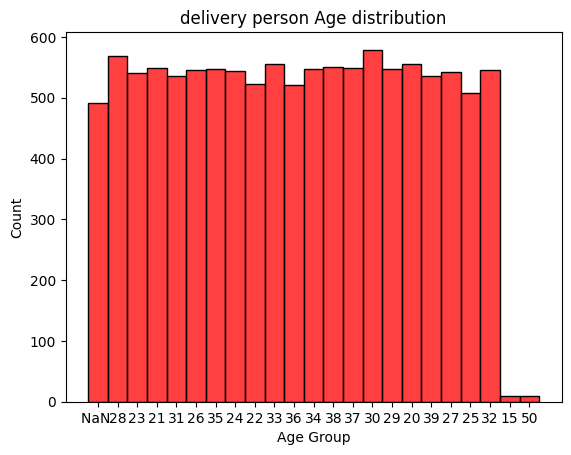

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.histplot(test_data.Delivery_person_Age,bins=20,kde=False,color='Red')
plt.title("delivery person Age distribution")
plt.xlabel("Age Group")
plt.show()

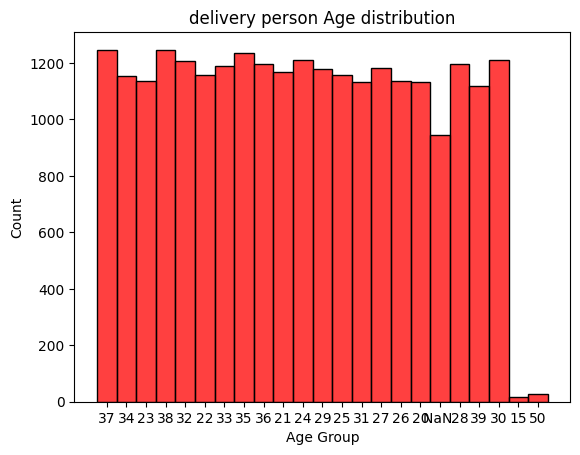

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.histplot(train_data.Delivery_person_Age,bins=20,kde=False,color='Red')
plt.title("delivery person Age distribution")
plt.xlabel("Age Group")
plt.show()

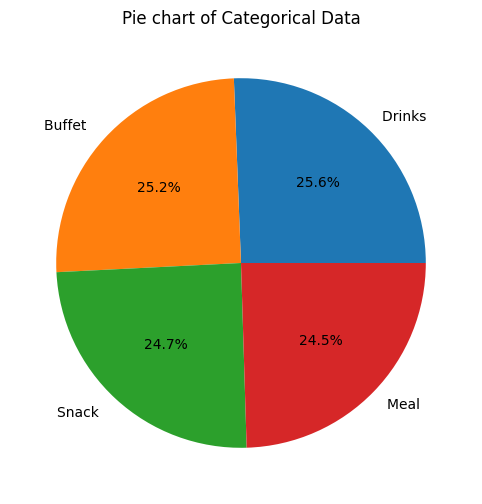

In [40]:
frequency = test_data['Type_of_order'].value_counts()
plt.figure(figsize=(10,6))
plt.pie(frequency, labels=frequency.index, autopct='%1.1f%%')
plt.title('Pie chart of Categorical Data')
plt.show()

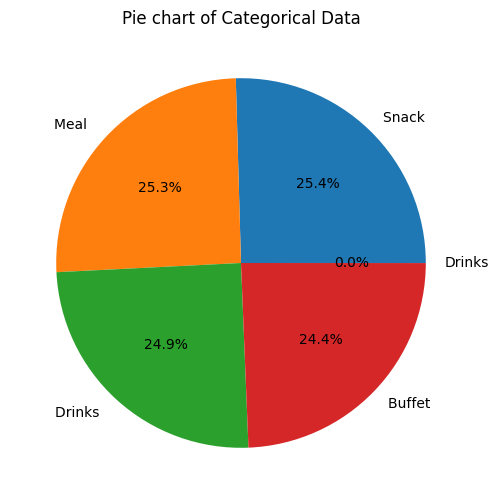

In [41]:

frequency = train_data['Type_of_order'].value_counts()
plt.figure(figsize=(10,6))
plt.pie(frequency, labels=frequency.index, autopct='%1.1f%%')
plt.title('Pie chart of Categorical Data')
plt.show()

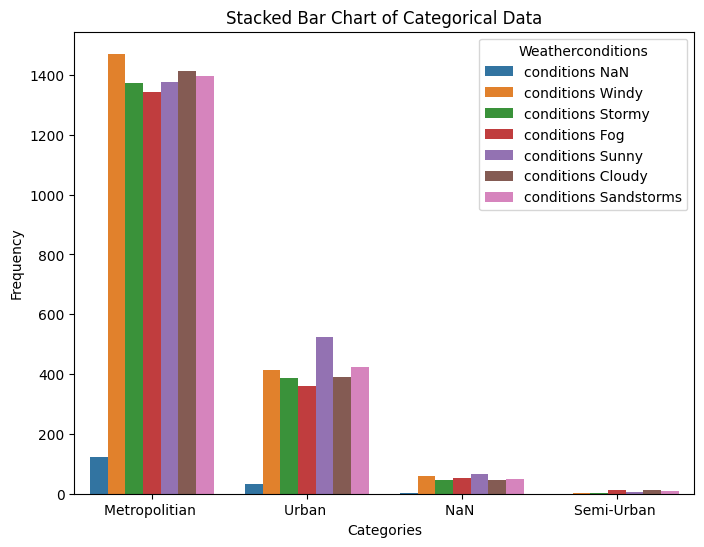

In [42]:
frequency = test_data['City'].value_counts()
plt.figure(figsize=(8,6))
sns.countplot(data=test_data, x='City', hue='Weatherconditions')
plt.xlabel('Categories')
plt.ylabel('Frequency')
plt.title('Stacked Bar Chart of Categorical Data')
plt.legend(title='Weatherconditions')
plt.show()

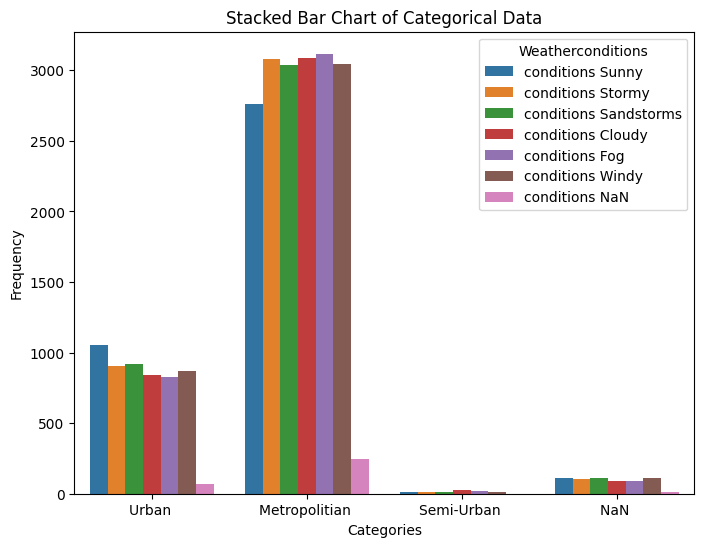

In [43]:
frequency = train_data['City'].value_counts()
plt.figure(figsize=(8,6))
sns.countplot(data=train_data, x='City', hue='Weatherconditions')
plt.xlabel('Categories')
plt.ylabel('Frequency')
plt.title('Stacked Bar Chart of Categorical Data')
plt.legend(title='Weatherconditions')
plt.show()

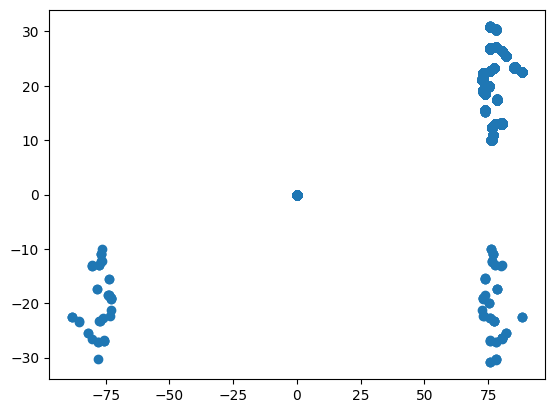

In [44]:
plt.scatter(x=test_data['Restaurant_longitude'],y=test_data['Restaurant_latitude'])
plt.show()

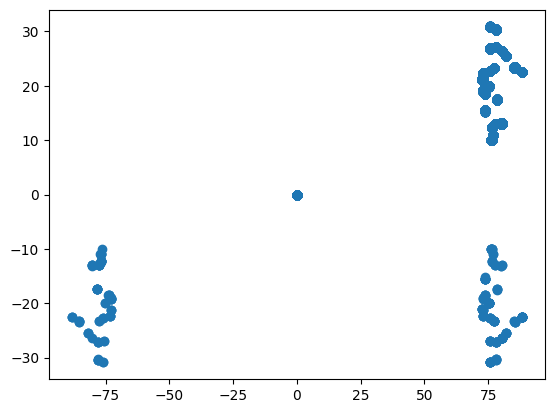

In [45]:
plt.scatter(x=train_data['Restaurant_longitude'],y=train_data['Restaurant_latitude'])
plt.show()

In [46]:
numeric_cols=pd.DataFrame(test_data.select_dtypes(exclude="object"))
corr=numeric_cols.corr()

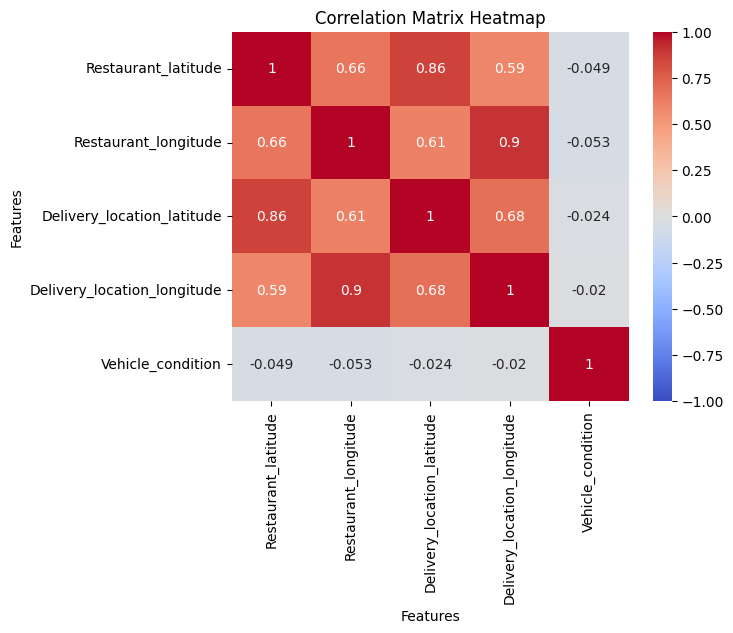

In [47]:
import seaborn as sns
import numpy as np
#sns.heatmap(corr,annot=True)
df=pd.DataFrame(test_data)

# Select only numeric columns
numeric_df = df.select_dtypes(include=[np.number])

# Calculate the correlation matrix and create the heatmap
corr_matrix = numeric_df.corr()
#plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix Heatmap')
plt.xlabel('Features')
plt.ylabel('Features')
plt.show()

In [48]:
import math
def haversine(lat1, lon1, lat2, lon2):
    lat1 = math.radians(lat1)
    lon1 = math.radians(lon1)
    lat2 = math.radians(lat2)
    lon2 = math.radians(lon2)

    radius = 6371.0

    dlon = lon2 - lon1
    dlat = lat2 - lat1
    a = math.sin(dlat/2)**2 + math.cos(lat1) * math.cos(lat2) * math.sin(dlon/2)**2
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1-a))
    distance = radius * c

    return distance

    test_data['distance'] = test_data.apply(lambda row: haversine(row['Restaurant_latitude'], row['Restaurant_longitude'], row['Delivery_location_latitude'], row['Delivery_location_longitude']), axis=1)

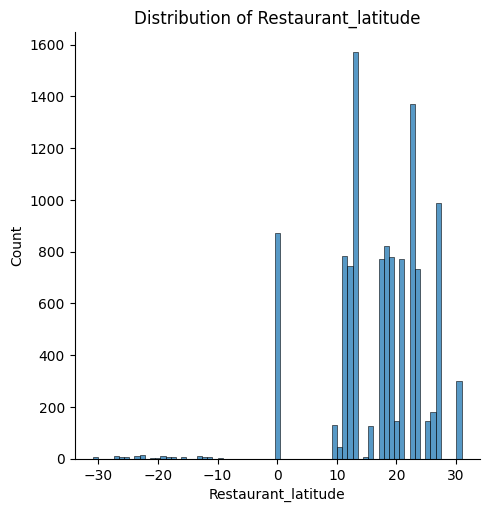

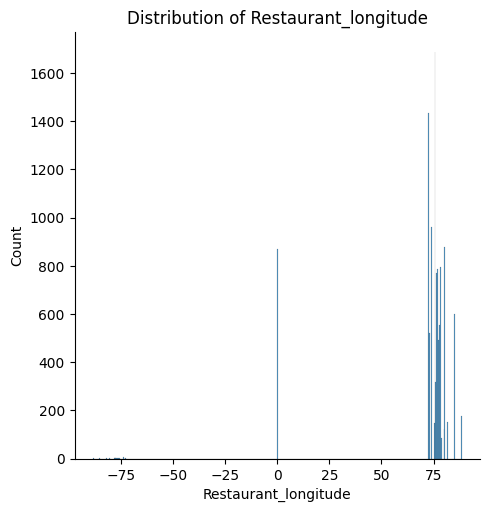

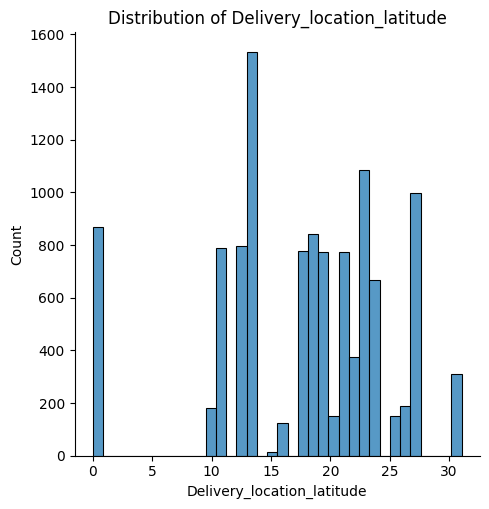

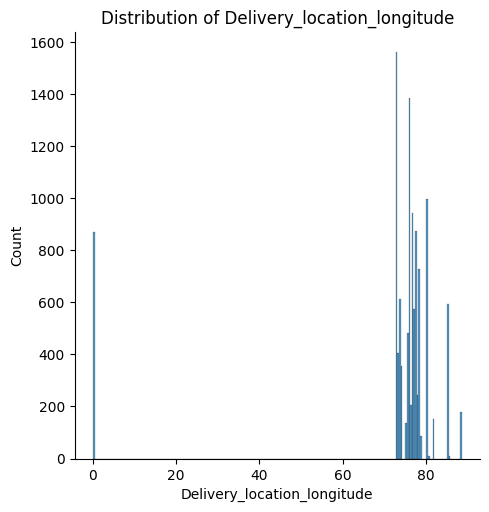

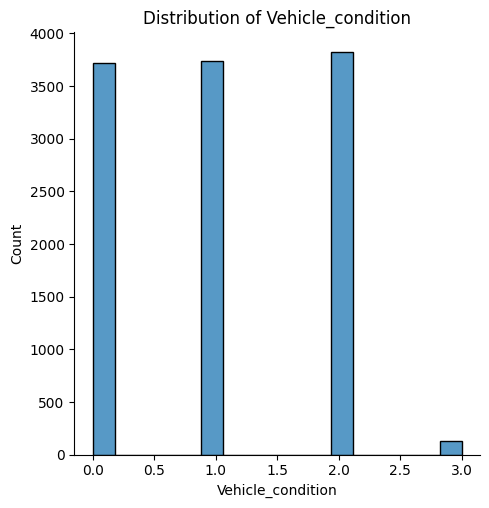

In [49]:
for column in test_data.columns:
  if test_data[column].dtype != 'O':
    sns.displot(test_data[column])
    plt.title(f'Distribution of {column}')
    plt.show()

In [50]:
 train_data['distance'] = train_data.apply(lambda row: haversine(row['Restaurant_latitude'], row['Restaurant_longitude'], row['Delivery_location_latitude'], row['Delivery_location_longitude']), axis=1)

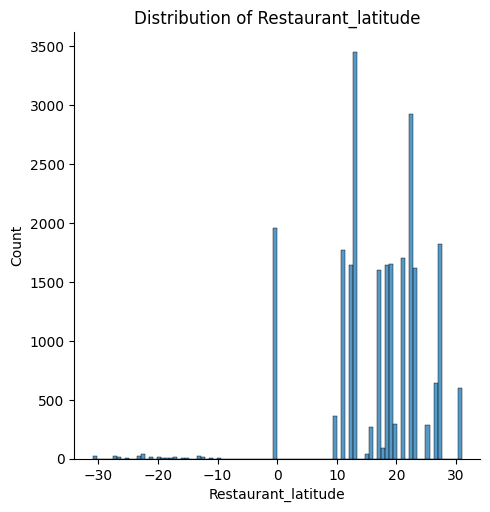

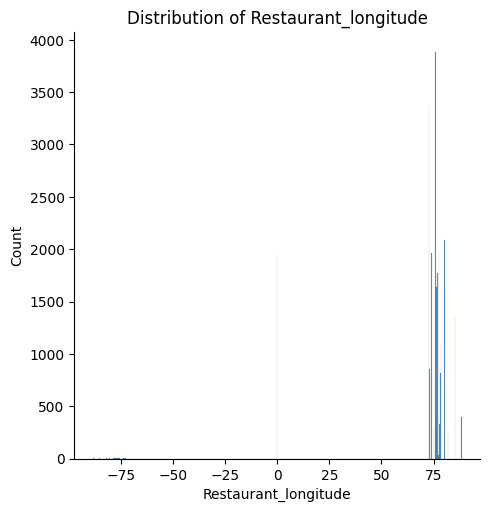

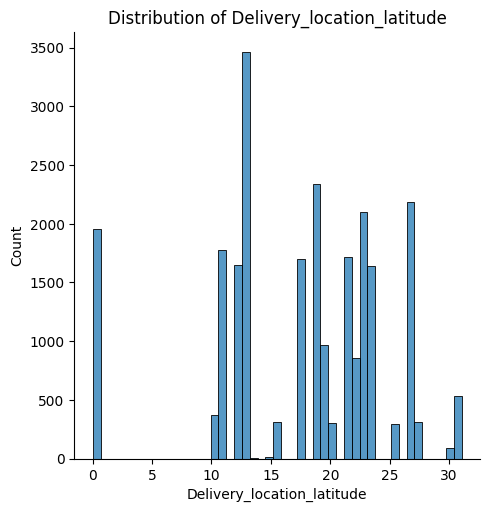

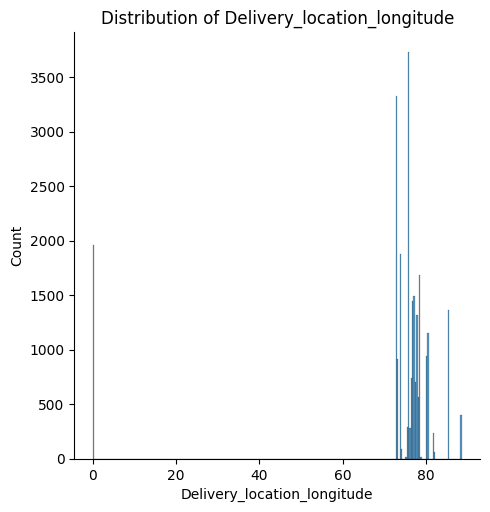

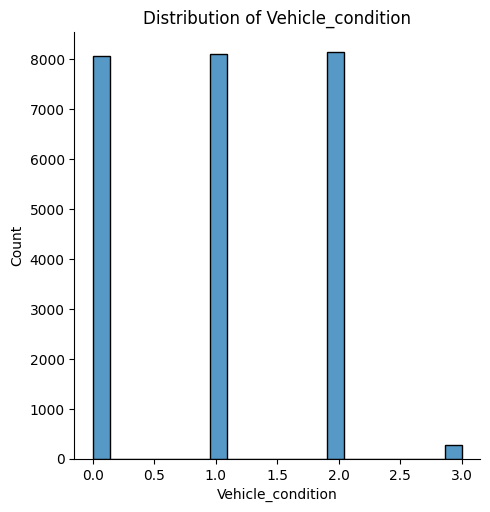

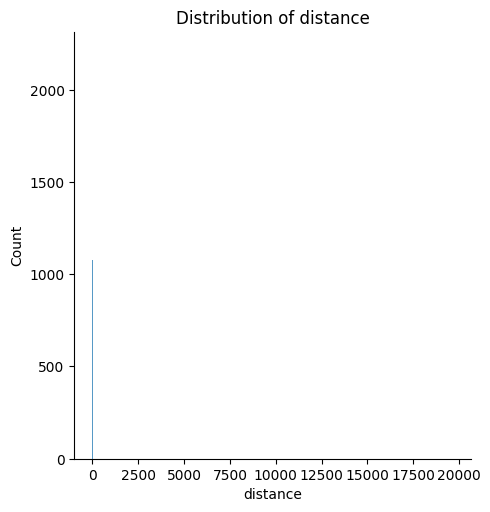

In [51]:
for column in train_data.columns:
  if train_data[column].dtype != 'O':
    sns.displot(train_data[column])
    plt.title(f'Distribution of {column}')
    plt.show()

In [52]:
train_data['Restaurant_latitude']=np.sqrt(train_data['Restaurant_latitude'])
train_data['distance']=np.sqrt(train_data['distance'])
print(train_data.columns)

Index(['Delivery_person_Age', 'Delivery_person_Ratings', 'Restaurant_latitude',
       'Restaurant_longitude', 'Delivery_location_latitude',
       'Delivery_location_longitude', 'Time_Orderd', 'Time_Order_picked',
       'Weatherconditions', 'Road_traffic_density', 'Vehicle_condition',
       'Type_of_order', 'Type_of_vehicle', 'multiple_deliveries', 'Festival',
       'City', 'Time_taken(min)', 'distance'],
      dtype='object')


In [53]:
train_data.shape

(24586, 18)

In [54]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import pickle

# Assuming df is your pandas DataFrame

label_encoders = {}

for col in df.columns:
    if df[col].dtype == 'object':  # Check if the column dtype is object
        label_encoders[col] = LabelEncoder()  # Initialize a LabelEncoder for this column
        df[col] = label_encoders[col].fit_transform(df[col])  # Fit and transform the column

# Save all label encoders into a single pickle file
with open("label_encoders.pkl", "wb") as f:
    pickle.dump(label_encoders, f)


In [55]:

# Assuming label_encoders is a dictionary where keys are column names and values are LabelEncoder objects

for col in df.columns:
    if df[col].dtype == 'object':  # Check if the column dtype is object (assuming '0' refers to object dtype)
        label_encoders[col] = LabelEncoder()  # Initialize a LabelEncoder for this column
        df[col] = label_encoders[col].fit_transform(df[col])  # Fit and transform the column
        filename = f"{col}.pkl"
        with open(filename, "wb") as f:
            pickle.dump(label_encoders[col], f)  # Save the fitted LabelEncoder to a file


In [56]:
train_data.columns

Index(['Delivery_person_Age', 'Delivery_person_Ratings', 'Restaurant_latitude',
       'Restaurant_longitude', 'Delivery_location_latitude',
       'Delivery_location_longitude', 'Time_Orderd', 'Time_Order_picked',
       'Weatherconditions', 'Road_traffic_density', 'Vehicle_condition',
       'Type_of_order', 'Type_of_vehicle', 'multiple_deliveries', 'Festival',
       'City', 'Time_taken(min)', 'distance'],
      dtype='object')

In [57]:
X=train_data[['Delivery_person_Ratings','Restaurant_latitude','Restaurant_longitude','Delivery_location_latitude','Delivery_location_longitude','Time_Orderd','Weatherconditions','Road_traffic_density','Type_of_order','Festival','City']]
y=train_data['Time_taken(min)']
y

0        (min) 24
1        (min) 33
2        (min) 26
3        (min) 21
4        (min) 30
           ...   
24581    (min) 35
24582    (min) 31
24583    (min) 33
24584    (min) 25
24585         NaN
Name: Time_taken(min), Length: 24586, dtype: object

In [58]:
y

0        (min) 24
1        (min) 33
2        (min) 26
3        (min) 21
4        (min) 30
           ...   
24581    (min) 35
24582    (min) 31
24583    (min) 33
24584    (min) 25
24585         NaN
Name: Time_taken(min), Length: 24586, dtype: object

In [59]:
# prompt: from y remove (min)

y = y.str.replace('(min)', '').astype(float)


In [60]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
import pickle

# Assuming 'X' is your DataFrame with the string values
# Identify columns with object (string) dtype
object_cols = X.select_dtypes(include=['object']).columns

# Iterate through object columns and encode them
for col in object_cols:
    # Use LabelEncoder or another suitable encoding method
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])

# Now apply StandardScaler
ss = StandardScaler()
X_scaled = ss.fit_transform(X)

In [61]:

X.isnull().sum()

Delivery_person_Ratings          0
Restaurant_latitude            226
Restaurant_longitude             0
Delivery_location_latitude       0
Delivery_location_longitude      0
Time_Orderd                      0
Weatherconditions                0
Road_traffic_density             0
Type_of_order                    0
Festival                         0
City                             0
dtype: int64

In [62]:
X['Restaurant_latitude'].fillna(X['Restaurant_latitude'].mean(),inplace=True)


In [63]:
X.isnull().sum()

Delivery_person_Ratings        0
Restaurant_latitude            0
Restaurant_longitude           0
Delivery_location_latitude     0
Delivery_location_longitude    0
Time_Orderd                    0
Weatherconditions              0
Road_traffic_density           0
Type_of_order                  0
Festival                       0
City                           0
dtype: int64

In [64]:
filename="ss.pk1"
pickle.dump(ss,open(filename,"wb"))

In [65]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [66]:
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error

def Predictions(model):
  model.fit(x_train,y_train)
  y_pred_test=model.predict(x_test)
  y_pred_train=model.predict(x_train)

  print("R2Score for Training", r2_score(y_pred_train,y_train))
  print("\n")
  print("MSE for Training:", mean_squared_error(y_pred_train,y_train))
  print("\n")
  print("MAE for Training:", mean_squared_error(y_pred_train,y_train))
  print("\n")

  # Handle potential NaN values in predictions or test data
  y_pred_test_clean = np.nan_to_num(y_pred_test)  # Replace NaN with 0
  y_test_clean = np.nan_to_num(y_test)  # Replace NaN with 0

  print("R2Score for Testing", r2_score(y_pred_test_clean, y_test_clean)) # Use cleaned arrays
  print("\n")
  print("MSE for Testing:", mean_squared_error(y_pred_test_clean, y_test_clean)) # Use cleaned arrays
  print("\n")
  print("MAE for Testing:", mean_absolute_error(y_pred_test_clean, y_test_clean)) # Use cleaned arrays

In [67]:
from sklearn.tree import DecisionTreeRegressor
dt=DecisionTreeRegressor()

In [68]:
Predictions(dt)


R2Score for Training 0.9996835862311817


MSE for Training: 0.028023523828892956


MAE for Training: 0.028023523828892956


R2Score for Testing 0.20965361071423227


MSE for Testing: 72.68221047399575


MAE for Testing: 6.492612172970042


In [69]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor()

In [70]:
Predictions(rf)

R2Score for Training 0.9168136611224432


MSE for Training: 5.60956584173295


MAE for Training: 5.60956584173295


R2Score for Testing 0.2825765253046971


MSE for Testing: 39.52031178633478


MAE for Testing: 4.855470211468076


In [71]:
from sklearn.neighbors import KNeighborsRegressor
knn=KNeighborsRegressor()

In [72]:
Predictions(knn)

R2Score for Training 0.12146520079774836


MSE for Training: 39.847091722595074


MAE for Training: 39.847091722595074


R2Score for Testing -0.39907612890696975


MSE for Testing: 59.3269947132981


MAE for Testing: 5.985115900772672


In [73]:
!pip install xgboost


In [74]:
from xgboost import XGBRegressor
xgb=XGBRegressor()

In [75]:
Predictions(xgb)


R2Score for Training 0.5672258897182407


MSE for Training: 24.15641340010047


MAE for Training: 24.15641340010047


R2Score for Testing 0.28974370809035965


MSE for Testing: 37.46504623628091


MAE for Testing: 4.748090067933662


In [76]:
import pickle
filename="rf.pkl"
pickle.dump(xgb,open(filename,"wb"))

In [77]:
y

0        24.0
1        33.0
2        26.0
3        21.0
4        30.0
         ... 
24581    35.0
24582    31.0
24583    33.0
24584    25.0
24585     NaN
Name: Time_taken(min), Length: 24586, dtype: float64

In [78]:
y.isnull().sum()

1

In [79]:
y.fillna(y.mean(), inplace=True)


In [80]:
y

0        24.0000
1        33.0000
2        26.0000
3        21.0000
4        30.0000
          ...   
24581    35.0000
24582    31.0000
24583    33.0000
24584    25.0000
24585    26.3193
Name: Time_taken(min), Length: 24586, dtype: float64

In [81]:
x_train

,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Time_Orderd,Weatherconditions,Road_traffic_density,Type_of_order,Festival,City
3193,24,4.309194,73.774723,18.699156,73.904723,170,4,2,3,1,3
10381,24,0.000000,0.000000,0.110000,0.110000,138,3,1,2,1,0
239,24,3.596289,77.614293,13.013298,77.694293,126,0,1,4,1,0
1432,25,4.304761,73.828972,18.640963,73.938972,0,0,2,3,1,0
2028,25,4.834769,85.335486,23.424989,85.385486,122,1,1,2,1,3
...,...,...,...,...,...,...,...,...,...,...,...
21575,24,3.510552,76.627961,12.393978,76.697961,122,6,1,2,1,0
5390,24,5.045032,81.841889,25.542350,81.931889,105,6,3,2,1,0
860,25,3.617518,80.220672,13.136439,80.270672,100,6,3,3,1,0
15795,22,4.172574,78.437225,17.470371,78.497225,117,4,3,0,1,0


In [83]:
x_prd=['24','4.309194','73.774723','18.699156','73.904723','170','4','2','3','1','3']

In [84]:
rf.fit(X,y)

RandomForestRegressor()

In [85]:
rf.predict([x_prd])

array([19.28])

In [86]:
y_train

3193     19.0
10381    19.0
239      43.0
1432     26.0
2028     20.0
         ... 
21575    17.0
5390     16.0
860      29.0
15795    30.0
23654    34.0
Name: Time_taken(min), Length: 19668, dtype: float64

In [87]:
#Get feature importances

importances = rf.feature_importances_

#Create a DataFrame for visualization

feature_importances = pd.DataFrame({'feature': X.columns, 'importance': importances})


In [88]:
feature_importances

,feature,importance
0,Delivery_person_Ratings,0.234033
1,Restaurant_latitude,0.062037
2,Restaurant_longitude,0.063240
3,Delivery_location_latitude,0.085472
4,Delivery_location_longitude,0.086759
5,Time_Orderd,0.118091
6,Weatherconditions,0.124388
7,Road_traffic_density,0.123914
8,Type_of_order,0.027378
9,Festival,0.052414
